In [85]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [86]:
#Read the data which is in tsv format
#This data has been cleaned by removing high correlation columns threshold 0.7
dataFrame = pd.read_csv("version1/Model_DataV3_0.7.tsv", sep='\t')

In [87]:
dataFrame

,post_uniqueId,post_event_list,country,post_browser_height,post_browser_width,timespent,cartcount,eventcount,event12,event147,...,prop14_pilot.search.dell.com,prop14_sc,prop14_serviceselection,prop14_shipping,prop14_spd,prop14_support,prop14_us,prop14_view,prop14_work,purchased
0,10018424053942873889082198747912907137,"197,131,20110=1.00,107,222,10008,158,175,285,5...",usa,949,1920,1364,14,1762,0,1,...,1,0,0,1,0,1,1,0,1,0
1,10026850716042389556576263521924262981,"197,131,222,107,109,175,212,169,525,163,248,20...",usa,769,1600,886,9,862,1,0,...,1,0,1,1,0,0,1,0,0,1
2,10032048104037663246053508571238522490,"292:4810471238521usbsd,197,131,222,107,101,169...",usa,553,375,120,3,184,0,1,...,0,0,0,1,0,0,0,0,1,0
3,10037812214202385317397104575584028455,"197,131,222,107,171,169,525,163,248,139,110,10...",usa,932,1582,965,5,589,0,1,...,1,0,0,1,0,1,1,0,1,0
4,10073685915684371025126228621365391683,"197,131,222,169,525,163,248,195,110,10001,147,...",usa,637,1366,616,3,221,1,1,...,0,0,1,0,1,0,0,0,0,0
5,10084050799645558924394285035561227652,"197,131,222,175,171,169,20103=1.00,163,525,248...",usa,958,1280,70,4,116,0,0,...,0,0,0,1,0,0,0,0,0,0
6,10090508707793678148010809163669860386,"197,131,106,107,10005,109,212,525,163,248,110,...",usa,685,1438,1099,5,306,0,0,...,0,0,0,0,0,0,1,1,0,1
7,1014823069263187570542639789830811546,"197,131,222,107,20117,109,285,290=42.19,262=11...",can,708,1536,1593,11,669,0,1,...,0,0,0,1,0,1,0,0,1,1
8,10154333302448123001296296030949807006,"197,131,222,107,171,169,525,163,248,110,10001,...",usa,628,1280,103,1,115,0,0,...,0,0,0,0,1,0,0,0,1,0
9,10160820624558160512046813118126678019,"197,131,222,107,285,292:2062418126676usdhs,293...",usa,622,414,1480,13,1813,1,1,...,1,1,1,0,1,0,1,0,0,0


In [88]:
#If we remove confirmation column, the accuracy of prediction is being decreased by 2.5%
#dataFrame = dataFrame.drop('prop14_confirmation',1)

In [89]:
#Get count of no of input columns
x_colCount = dataFrame.shape[1]-1
x_colCount

33

In [90]:
#load all the columns which effect the purchase of the user
x = dataFrame.iloc[:,2:x_colCount ].values

In [91]:
#Dislaying array x
x

array([['usa', 949, 1920, ..., 1, 0, 1],
       ['usa', 769, 1600, ..., 1, 0, 0],
       ['usa', 553, 375, ..., 0, 0, 1],
       ...,
       ['can', 905, 1817, ..., 0, 0, 0],
       ['usa', 804, 1140, ..., 0, 0, 1],
       ['usa', 641, 913, ..., 0, 0, 0]], dtype=object)

In [92]:
#Loading the dependent column values i.e purchased column which describes if a user made a purchase or not
y = dataFrame.loc[:, ['purchased']].values

In [93]:
#column country is categorical data, which needs to be converted into numerical values using labels
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [94]:
#Labelling the categorical data. In this case we are using coulumn 0, which is country
xLabelEncoder = LabelEncoder()
x[:, 0] = xLabelEncoder.fit_transform(x[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
x = onehotencoder.fit_transform(x).toarray()

In [95]:
#Displaying x
x

array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [96]:
#Print shape
x.shape

(4034, 71)

In [97]:
#Loading library
from sklearn.model_selection import train_test_split

In [98]:
#Split array into random train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [99]:
x_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
#Scaling the values for easier computations.
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [102]:
#Get input count and nodes count for initializing the model layers. no of nodes can be any number but we are choosing average of input and output colums
inputsCount = x.shape[1]
nodesCount = round((inputsCount+1)/2)

In [103]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [104]:
#We are using a sequential model
model = Sequential()

In [105]:
#first input layer
#units replace output_dim, init is replaced by kernel_initializer
model.add(Dense(units = 38, kernel_initializer="uniform", activation = 'relu', input_dim = inputsCount))

In [106]:
#adding hidden layer
model.add(Dense(units = 38, kernel_initializer="uniform", activation = 'relu'))
model.add(Dense(units = 38, kernel_initializer="uniform", activation = 'relu'))

In [107]:
#adding output layer
model.add(Dense(units = 1, kernel_initializer="uniform", activation = 'sigmoid'))

In [108]:
#compiling artificial neural network
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy','mse'])

In [109]:
#fit artificial neural network to training set
history = model.fit(x_train, y_train, batch_size = 100, epochs = 150)

Epoch 1/150
3025/3025 [==============================] - 1s 193us/step - loss: 0.6693 - acc: 0.8063 - mean_squared_error: 0.2381
Epoch 2/150
3025/3025 [==============================] - 0s 30us/step - loss: 0.4686 - acc: 0.8083 - mean_squared_error: 0.1519
Epoch 3/150
3025/3025 [==============================] - 0s 26us/step - loss: 0.3749 - acc: 0.8083 - mean_squared_error: 0.1225
Epoch 4/150
3025/3025 [==============================] - 0s 29us/step - loss: 0.3493 - acc: 0.8083 - mean_squared_error: 0.1150
Epoch 5/150
3025/3025 [==============================] - 0s 28us/step - loss: 0.3329 - acc: 0.8083 - mean_squared_error: 0.1096
Epoch 6/150
3025/3025 [==============================] - 0s 28us/step - loss: 0.3212 - acc: 0.8083 - mean_squared_error: 0.1057
Epoch 7/150
3025/3025 [==============================] - 0s 26us/step - loss: 0.3142 - acc: 0.8083 - mean_squared_error: 0.1036
Epoch 8/150
3025/3025 [==============================] - 0s 27us/step - loss: 0.3067 - acc: 0.8083 - me

3025/3025 [==============================] - 0s 30us/step - loss: 0.1086 - acc: 0.9643 - mean_squared_error: 0.0305
Epoch 65/150
3025/3025 [==============================] - 0s 30us/step - loss: 0.1081 - acc: 0.9603 - mean_squared_error: 0.0317
Epoch 66/150
3025/3025 [==============================] - 0s 27us/step - loss: 0.1072 - acc: 0.9630 - mean_squared_error: 0.0306
Epoch 67/150
3025/3025 [==============================] - 0s 28us/step - loss: 0.1144 - acc: 0.9587 - mean_squared_error: 0.0338
Epoch 68/150
3025/3025 [==============================] - 0s 26us/step - loss: 0.1057 - acc: 0.9623 - mean_squared_error: 0.0308
Epoch 69/150
3025/3025 [==============================] - 0s 27us/step - loss: 0.1088 - acc: 0.9610 - mean_squared_error: 0.0320
Epoch 70/150
3025/3025 [==============================] - 0s 27us/step - loss: 0.1091 - acc: 0.9607 - mean_squared_error: 0.0321
Epoch 71/150
3025/3025 [==============================] - 0s 25us/step - loss: 0.1228 - acc: 0.9544 - mean_squ

3025/3025 [==============================] - 0s 31us/step - loss: 0.0898 - acc: 0.9650 - mean_squared_error: 0.0218
Epoch 127/150
3025/3025 [==============================] - 0s 33us/step - loss: 0.0821 - acc: 0.9660 - mean_squared_error: 0.0201
Epoch 128/150
3025/3025 [==============================] - 0s 39us/step - loss: 0.0818 - acc: 0.9643 - mean_squared_error: 0.0204
Epoch 129/150
3025/3025 [==============================] - 0s 31us/step - loss: 0.0777 - acc: 0.9666 - mean_squared_error: 0.0193
Epoch 130/150
3025/3025 [==============================] - 0s 36us/step - loss: 0.0813 - acc: 0.9653 - mean_squared_error: 0.0203
Epoch 131/150
3025/3025 [==============================] - 0s 34us/step - loss: 0.0750 - acc: 0.9689 - mean_squared_error: 0.0182
Epoch 132/150
3025/3025 [==============================] - 0s 31us/step - loss: 0.0722 - acc: 0.9689 - mean_squared_error: 0.0173
Epoch 133/150
3025/3025 [==============================] - 0s 34us/step - loss: 0.0700 - acc: 0.9689 - m

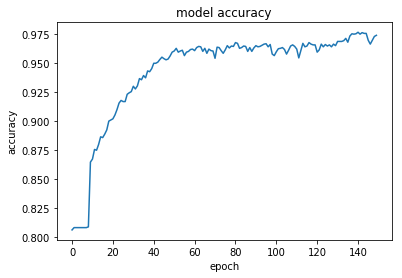

In [110]:
#Visualization of model accuracy for each epoch
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

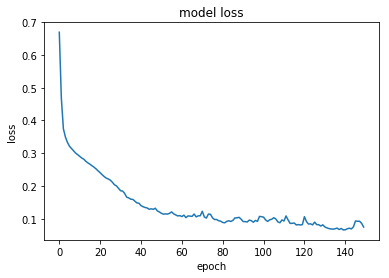

In [111]:
#Visualization of model loss for each epoch
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

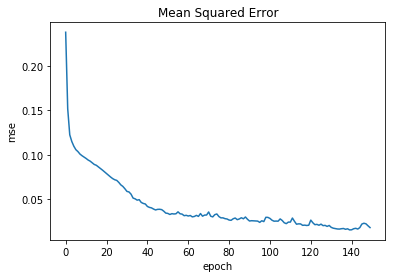

In [112]:
#Visualization of mean squared error
plt.plot(history.history['mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.show()

In [113]:
#Predicting results from test set
y_pred = model.predict(x_test)

In [114]:
y_pred

array([[3.3104463e-14],
       [9.8877853e-01],
       [4.1642977e-08],
       ...,
       [1.1056336e-14],
       [1.8653709e-28],
       [1.3284681e-06]], dtype=float32)

In [115]:
maybe = (y_pred > 0.2) & (y_pred <= 0.5)

In [116]:
np.sum(maybe)

27

In [117]:
#Converting to boolean either true or false
y_pred = (y_pred > 0.5)

In [118]:
from sklearn.metrics import confusion_matrix

In [119]:
confusionMatrix = confusion_matrix(y_test,y_pred)

In [120]:
#To check the accuracy
confusionMatrix

array([[763,  66],
       [ 67, 113]], dtype=int64)

In [121]:
#Caluculating accuracy of our predictions
(confusionMatrix[0][0]+confusionMatrix[1][1])/1009

0.8681863230921705

In [122]:
#Caluculating accuracy of predicting abandoned users
confusionMatrix[0][0]/(confusionMatrix[0][0]+confusionMatrix[0][1])

0.9203860072376358